# Complex Networks: Assignment 19

Name: Patrick L. Harvey\
Date: 20230223

## Functions

In [215]:
def imports(disp: bool = False):
    #!pip install --upgrade pip
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import seaborn.objects as so
    mpl.rc('font',family = 'serif', serif = 'cmr10')
    if disp:
        loaded_imports()
        
def loaded_imports():
    print('Imported matplotlib as mpl')
    print('Imported matplotlib.pyplot as plt')
    print('Imported numpy as np')
    print('Imported pandas as pd')
    print('Imported seaborn as sns')
    print('Imported seaborn.objects as so')

def magnitude(v):
    import math
    return math.sqrt(sum(pow(i, 2) for i in v))

def plot_line(ax = None,
              alpha: float = 1/3,
              k: float = 1/2):
    S, V = allometric_scaling(alpha = alpha, k = k)
    sns.lineplot(x = S[:,0],
                 y = V[:,0],
                 alpha = 0.5,
                 ax = ax,
                 linewidth = 0.5)
    sns.despine()
    return ax

def allometric_scaling(alpha: float = 1/3,
                       l1:    float = 1.,
                       l2:    float = 1.,
                       l3:    float = 1.,
                       n:       int = 100,
                       rando: bool = False):
    """
    @Description:
    Generate arrays to illustrate the relationship
    between surface area and volume for a 3-D
    parallelepiped object with allometric
    scaling (e.g. y = k * x ** alpha).

    @Parameters:
    k: float, Default = 1/1.
        The prefactor scaling volume.
        Functionally, this linearly shifts 
        the relationship S:V left or right.
        Left  -> 0
        Right -> inf
    
    alpha: float, Default = 2/3.
        Get big or die trying.
        Functionally, this determines the
        slope for the relationship S:V.
        Undefined -> 0
        0 -> inf
        
    n: int, Default = 100.
        The desired size of the array.
        Functionally, this determines how
        much memory you feel like using up.

    @Returns:
    tuple(S, V):
        S: Surface area (c * V ** 1 - alpha)
        V: Volume  (c1*l1**(1/gam1) * c2*l2**(1/gam2) * c3*l3**(1/gam3))
                   (   k * (l1)**1/gam1 * l2**(1/gam2) * l3**(1/gam3)  )
                   log(V) = (1 - )log(k) + log()

    # Below would be for vectors li
    # V = np.abs(np.dot(np.cross(l1, l2), l3))
    """
    imports()
    c = np.geomspace(1,n,n)
    V_iso = (1/c)**3
    S_iso = 6/c
    if rando:
        c = np.random.random(size = (3,n))
    gams = np.random.dirichlet([1, 1, 1])
    l1 = c[0,:]*l1**(1/gams[0])
    l2 = c[1,:]*l2**(1/gams[1])
    l3 = c[2,:]*l3**(1/gams[2])
    V = l1 * l2 * l3
    S = 2*( (l1*l2) + (l1*l3) + (l3*l2) )
    return S, V, V_iso, S_iso

def plot_allometric(alpha: float = 2/3,
                    n:     int   = 100,
                    k:     float = 1.):
    from fractions import Fraction
    import matplotlib as mpl

    # Running imports just in case
    imports()

    # Set plot style
    sns.set_style("ticks")
    sns.color_palette("magma", as_cmap=True)
    plt.rcParams.update({"text.usetex": True, "font.family": "cmr10"})    

    # Build Figure and subplots
    fig = plt.figure(constrained_layout = True,
                     figsize = (5,5),
                     dpi = 200)
    
    axs = fig.subplots(2, 2,
                       sharex = True,
                       sharey = True)
    fig.suptitle('Surface Area vs. Volume\n'r'($S=kV^{(1 - \alpha)}$)', fontsize = 10)
    fig.supxlabel(r'Log$_{10}(S)$', fontsize = 10)
    fig.supylabel(r'Log$_{10}(V)$', fontsize = 10)
    
    for pos, ax in enumerate(np.array(axs).flatten()):
        alph = pos / 3
        a_frac = str(Fraction(alph).limit_denominator())
        k_frac = str(Fraction(k).limit_denominator())

        ax = plot_line(ax, alpha = alph)

        k_vals = np.geomspace(1,5,10)
        for i in k_vals:
            ax = plot_line(ax, alpha = alph, k = i/k)
        ax_title_text = r'$\alpha = ${}'.format(Fraction(a_frac))
        ax_title_text += '\n'+r'$k: ${:0.0f} to 1/{:0.0f}'.format(min(k_vals), max(k_vals))
        ax.set(xscale="log", yscale="log")
        ax.set_title(ax_title_text,
                     fontsize = 6,
                     loc = 'left')
        
    fig.legend(['1/{:1.1f}'.format(i) for i in k_vals],
               title = r'$k = \cdots$',
               handleheight = 0.,
               frameon = False,
               title_fontsize = 6,
               fontsize = 6,
               bbox_to_anchor = (1,0.4))
    # fig.text(.5, 0,
    #          r'$\alpha = {}$; $k = ${}'.format(a_frac, k_frac),
    #          ha='center')
    #fig.savefig('S_vs_V.png')

    plt.show()
    

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
S, V = allometric_scaling(alpha = 1/3, k = 1)
xx, yy = np.meshgrid(S,V)
k = np.geomspace(0.01,1,100)*xx
fig = plt.figure(figsize=(5,5), dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S, V, k, cmap="magma", linewidth=0, antialiased=False, alpha=0.5)
ax.set_xlabel('S')
ax.set_ylabel('V')
ax.set_title('S vs. V')
ax.set_zticks([])
ax.autoscale_view()
ax.grid(False)
plt.show()


/var/folders/g7/vpc5kdj900s7gqc1w9rq6nrh0000gn/T/ipykernel_28860/536661928.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1,1,figsize=(5,5),dpi=180)


<function matplotlib.pyplot.show(close=None, block=None)>

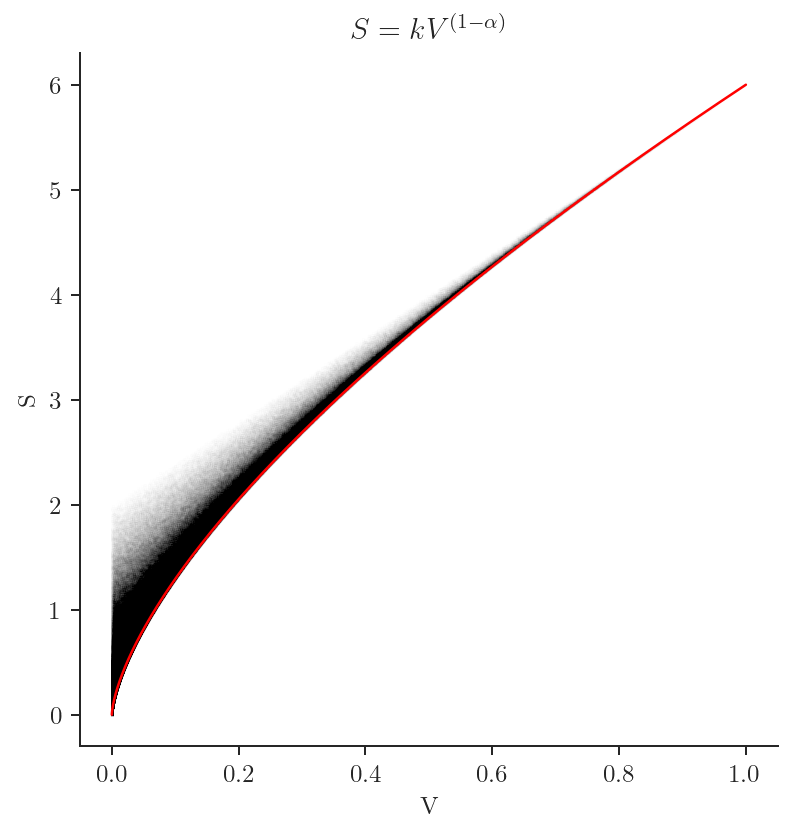

In [232]:
s,v, v_iso, s_iso = allometric_scaling(n=1000000,rando=True)
fig, ax = plt.subplots(1,1,figsize=(5,5),dpi=180)
ax.scatter(v,s,
           s=0.001,
           c = 'k',
           marker = '.',
           alpha=0.09)
ax.plot((v_iso/np.max(v_iso))**(1/2),
        s_iso,
        'r',
        linewidth = 1)
ax.set_xlabel('V')
ax.set_ylabel('S', )
ax.set_title(r'$S=kV^{(1-\alpha)}$')
sns.despine()
plt.show

In [214]:
s_iso

array([6.00000000e+00, 6.00069082e+00, 6.00138172e+00, ...,
       5.99861859e+05, 5.99930926e+05, 6.00000000e+05])

# For Later

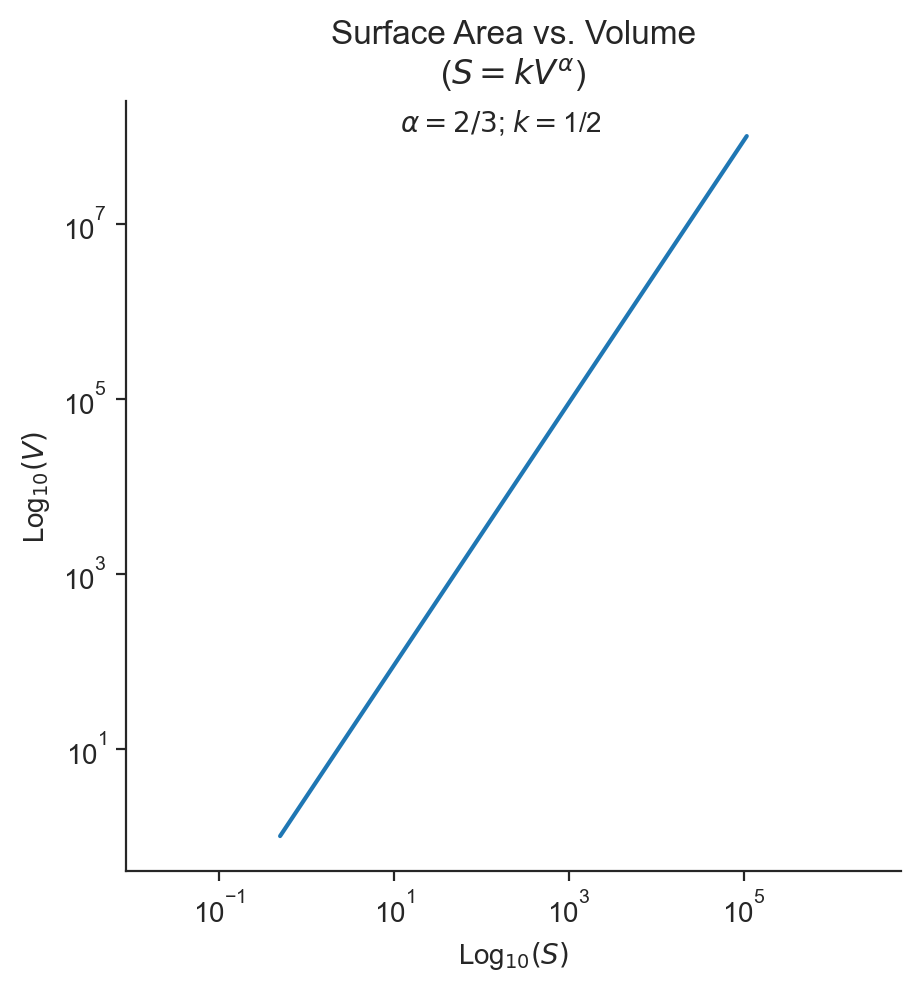

In [ ]:
from fractions import Fraction

fig, ax = plt.subplots(figsize=(5,5), dpi=180)
n = 10*10
for i in range(1,n):
    a = i/(n-1)
    a_frac = r'$\alpha = $'+str(Fraction(a).limit_denominator())
    allometric_scaling(alpha = a).plot(x = 'S',
                                       y = 'V',
                                       kind = 'line',
                                       loglog = True,
                                       ax = ax,
                                       alpha = 0.5,
                                       legend = None)
                                       #label = a_frac)
sns.despine()
fig.text(.5, -.05,
             r'$\alpha = \frac{1}{10^{10}}$ to $1$; $k = 1/2$',
             ha='center')
plt.title('Surface Area vs. Volume\n'r'($S=kV^{\alpha}$)', fontsize = 12)
plt.xlabel(r'Log$_{10}(S)$')
plt.ylabel(r'Log$_{10}(V)$')
# plt.xscale('log')
# plt.yscale('log')
plt.axis('equal')
plt.show()

plot_allometric(1/2, 2/3)